In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
file_k = "Data/kunden.csv"
file_b = "Data/besucher.csv"
file_geo = "Data/geo.txt"

In [3]:
df_k = pd.read_csv(file_k, sep = ";", decimal = ".")
df_b = pd.read_csv(file_b, sep = ";", decimal = ",")
df_geo = pd.read_table(file_geo, delimiter = "\t") #\t muss verwendet werden damit die Spalten der Liste aus der txt Datei separiert werden können

In [4]:
df_geo

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern
...,...,...
1990,K1991,Hessen
1991,K1992,Baden-Württemberg
1992,K1993,Nordrhein-Westfalen
1993,K1994,Berlin


In [5]:
df_b_k = pd.concat([df_b,df_k], ignore_index = True)
df_b_k

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis
0,30,39919.095335,0.0,29.0,K1814,NaN
1,41,53430.673086,0.0,27.0,K1544,NaN
2,64,73163.216927,0.0,32.0,K1945,NaN
3,41,36761.482581,0.0,44.0,K1825,NaN
4,35,42684.331632,1.0,33.0,K1144,NaN
...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58
1991,38,48301.000000,1.0,33.0,K0122,64230.98
1992,67,63547.000000,1.0,41.0,K1045,103123.57
1993,37,32686.000000,1.0,36.0,K1096,49215.87


In [6]:
df_bkg = pd.merge(df_b_k, df_geo, on = "KundeNr")
df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen
...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg


In [7]:
# Berechnung von Q1 (25. Perzentil), Q3 (75. Perzentil) und IQR
Q1 = df_bkg['Einkommen'].quantile(0.25)
Q3 = df_bkg['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

# Berechnung der Ausreißer-Grenzen
untere_grenze = Q1 - 1.6 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst
obere_grenze = Q3 + 5 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst

# Identifizierung von Ausreißern
df_bkg['Ausreißer'] = (df_bkg['Einkommen'] < untere_grenze) | (df_bkg['Einkommen'] > obere_grenze)

df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern,False
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg,False
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg,False
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg,False
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen,False
...,...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen,False
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen,False
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin,False
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg,False


In [8]:
untere_grenze

9204.719763225141

In [9]:
#Median des Einkommens bestimmen 
einkommen_medianwert = df_bkg["Einkommen"].median()
einkommen_medianwert 

59104.51301372704

In [10]:
#Überprüfung des Median
Q2 = df_bkg['Einkommen'].quantile(0.5)
Q2

59104.51301372704

In [11]:
#Ersetzen der oberen und unteren Werte
df_bkg.loc[df_bkg["Einkommen"] < untere_grenze, "Einkommen"] = einkommen_medianwert
df_bkg.loc[df_bkg["Einkommen"] > obere_grenze, "Einkommen"] = einkommen_medianwert

In [12]:
df_bkg.iloc[1299]

Alter                             68
Einkommen               59104.513014
Geschlecht                       0.0
Zeit                            52.0
KundeNr                        K0701
Preis                       87209.72
Niederlassung    Nordrhein-Westfalen
Ausreißer                       True
Name: 1299, dtype: object

In [13]:
df_bkg.iloc[1857, 1]

59104.51301372704

In [14]:
#Identifikation fehlender Werte bei Kategorie Geschlecht
geschlecht_NAN = df_bkg[df_bkg["Geschlecht"].isna()]
geschlecht_NAN

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
1001,41,46542.0,NaN,40.0,K0024,63477.00,Baden-Württemberg,False
1203,53,49798.0,NaN,39.0,K0166,61329.51,Nordrhein-Westfalen,False
1479,64,83452.0,NaN,62.0,K0090,133180.70,Niedersachsen,False
1503,52,66602.0,NaN,45.0,K0325,98756.07,Bayern,False
1622,67,91461.0,NaN,66.0,K0790,131748.07,Berlin,False


In [15]:
#Identifikation des Modalwert bei der Kategorie Geschlecht
geschlecht_modalwert = df_bkg["Geschlecht"].mode()[0]
geschlecht_modalwert 

1.0

In [16]:
#Geschlechtswerte ohne Eintrag durch Modalwert ersetzen
df_bkg["Geschlecht"] = df_bkg["Geschlecht"].fillna(geschlecht_modalwert)
df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern,False
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg,False
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg,False
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg,False
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen,False
...,...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen,False
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen,False
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin,False
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg,False


In [17]:
#Identifikation von wahrscheinlich falschen oder gar illegalen Altersangaebn
unglaubwürdiges_alter = df_bkg[(df_bkg["Alter"] > 90) | (df_bkg["Alter"] < 18)]
unglaubwürdiges_alter

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
1033,100,88749.0,0.0,64.0,K0494,119134.23,Bayern,False
1602,120,61857.0,1.0,52.0,K0039,104214.07,Baden-Württemberg,False


In [18]:
#Identifikation des Modalwert bei der Kategorie Alter
alter_medianwert = df_bkg["Alter"].median()
alter_medianwert 

51.0

In [19]:
#Bereinigung Alter und Überprüfung
df_bkg.loc[df_bkg["Alter"] > 90, "Alter"] = alter_medianwert
df_bkg.iloc[1602]

Alter                           51
Einkommen                  61857.0
Geschlecht                     1.0
Zeit                          52.0
KundeNr                      K0039
Preis                    104214.07
Niederlassung    Baden-Württemberg
Ausreißer                    False
Name: 1602, dtype: object

In [20]:
#Definition der Bundesländer
bundesländer = ["Baden-Württemberg", "Bayern", "Berlin", "Brandenburg", "Bremen", "Hamburg", "Hessen",
                "Mecklenburg-Vorpommern", "Niedersachsen", "Nordrhein-Westfalen", "Rheinland-Pfalz", "Saarland",
                "Sachsen", "Sachsen-Anhalt", "Schleswig-Holstein", "Thüringen"]
#Nur jene Einträge für Niederlassungen anzeigen lassen, welche *nicht* in vorheriger Liste vorhanden sind
bundesländer_falsche_namen = df_bkg[~df_bkg["Niederlassung"].isin(bundesländer)]
bundesländer_falsche_namen

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
299,44,54025.601631,1.0,30.0,K1987,NaN,NRW,False
491,49,54754.525450,1.0,44.0,K1995,NaN,Berlin-Charlottenburg,False
587,63,84772.480847,1.0,30.0,K1973,NaN,Düsseldorf,False
840,32,40776.023145,1.0,13.0,K1609,NaN,BERLIN,False
911,43,52813.000000,0.0,44.0,K0762,67106.32,BERLIN,False
1249,61,56063.000000,1.0,44.0,K0679,98148.54,Berlin-Mitte,False
1472,55,66738.000000,1.0,52.0,K0413,120215.50,Düsseldorf,False
1510,62,75575.000000,1.0,50.0,K0023,124516.56,NRW,False
1783,58,65271.000000,1.0,44.0,K0002,106258.99,NRW,False
1812,30,28784.000000,1.0,34.0,K0677,42416.07,Berlin-Mitte,False


In [21]:
#Jetzt ersetzen wir die ungewollten Bezeichnungen der Niederlassungen mit den gewollten Bezeichnungen
#1. den "falschen" Schlüsseln die gewollten Werte zuordnen
ersetzen_dict = {
    "Berlin-Charlottenburg": "Berlin",
    "BERLIN": "Berlin",
    "Berlin-Mitte": "Berlin",
    "Düsseldorf": "Nordrhein-Westfalen",
    "NRW": "Nordrhein-Westfalen",
}
#2. Die geändert Werte jetzt in das Datafram übertragen
df_bkg["Niederlassung"].replace(ersetzen_dict, inplace=True)

In [22]:
#Überprüfung ob korrekt ersetzt wurde (Stichprobe)
df_bkg.iloc[1472, 6]

'Nordrhein-Westfalen'

In [23]:
df_bkg.to_csv("df_final.csv", index=False)

### F1 Wie viele Autos wurden verkauft?

In [24]:
df_preis_vorhanden = df_bkg[df_bkg["Preis"].notna()]
df_autos_verkauft = df_preis_vorhanden["KundeNr"].nunique()
df_autos_verkauft

1104

### F2 Was ist der Höchst-, Mindest- und Durchschnittspreis der verkauften Autos?

In [25]:
# Ermittlung der Kunden
df_kunden = df_bkg["Preis"].dropna()

In [26]:
# Berechnung des Höchstpreises
df_höchstpreis = np.max(df_kunden)
df_höchstpreis

165482.31

In [27]:
# Berechnung des Mindestpreises
df_mindestpreis = np.min(df_kunden)
df_mindestpreis

21471.65

In [28]:
# Berechnung des Durchschnittspreis
df_durchschnittspreis = np.mean(df_kunden)
df_durchschnittspreis

88975.19871376813

#### Bild 1: Balkendiagramm vergleich des Höchst-, Durchschnitts- und Mindestpreises

In [29]:
import seaborn as sns
# Erstellen eines Datenrahmens für die Visualisierung
price_stats = pd.DataFrame({
    'Preis': ['Höchster Preis', 'Durchschnittlicher Preis', 'Niedrigster Preis'],
    'Wert': [df_höchstpreis, df_durchschnittspreis, df_mindestpreis]
})

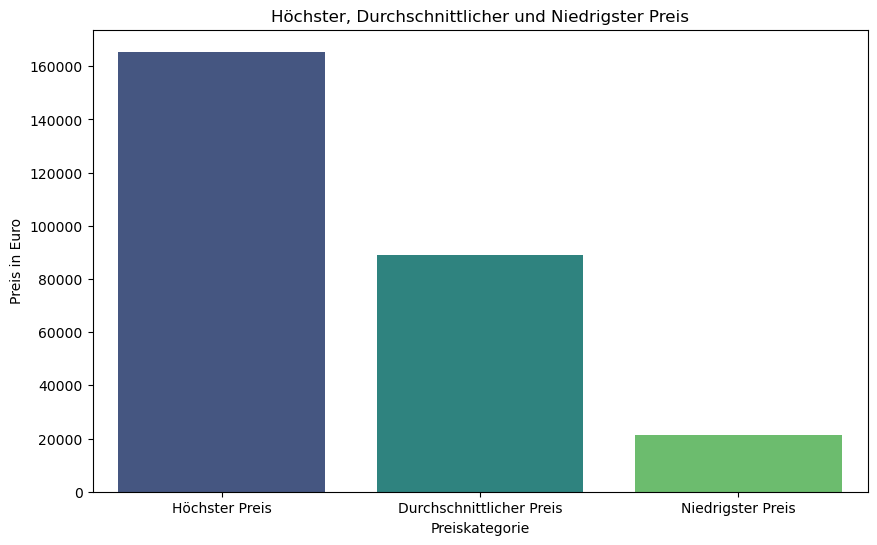

In [30]:
### Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x='Preis', y='Wert', data=price_stats, palette='viridis')
plt.title('Höchster, Durchschnittlicher und Niedrigster Preis')
plt.ylabel('Preis in Euro')
plt.xlabel('Preiskategorie')
plt.show()

### F3 Wie hoch war der Gesamtumsatz?

In [31]:
df_umsatz = df_bkg["Preis"].dropna().sum()
df_umsatz

98228619.38000001

### F4 Wieviele Autos wurden pro Bundesland verkauft?

In [32]:
#Ermittelung der Spalten wo Preis vorhanden ist
df_mit_preis = df_bkg[df_bkg["Preis"].notna()]
#Ermittlung Anzahl pro Bundesland
anzahl_verkauf_pro_land = df_mit_preis.groupby('Niederlassung')['Preis'].count()
anzahl_verkauf_pro_land 

Niederlassung
Baden-Württemberg      205
Bayern                 188
Berlin                 126
Brandenburg             37
Hamburg                 43
Hessen                  96
Niedersachsen           96
Nordrhein-Westfalen    175
Sachsen                 89
Thüringen               49
Name: Preis, dtype: int64

#### Bild 2: Balkendiagramm - Verkaufsanzahl pro Bundesland (von Käufern)

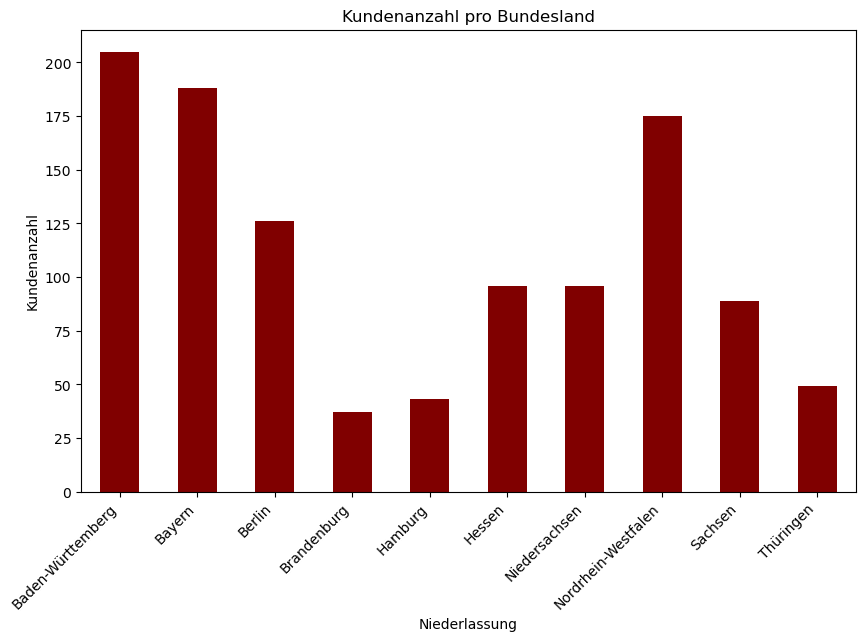

In [33]:
#Balkendiagramm erstellen
#Verwendung von #800000 für die Farbe "Weinrot"
plt.figure(figsize=(10,6))
anzahl_verkauf_pro_land.plot(kind = "bar", color = "#800000")
#Balkendiagramm benennen
plt.title("Kundenanzahl pro Bundesland")
plt.xlabel("Niederlassung")
plt.ylabel("Kundenanzahl")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')

### F5 Wie hoch war der durchschnittliche Umsatz pro Bundesland?


In [34]:
#Ermittelung der Spalten wo Preis vorhanden ist
df_mit_preis = df_bkg[df_bkg["Preis"].notna()]
#Ermittlung Durchschnittsumsatz pro Bundesland
durchschnitt_umsatz_pro_land = df_mit_preis.groupby('Niederlassung')['Preis'].mean()
durchschnitt_umsatz_pro_land

Niederlassung
Baden-Württemberg      90969.560000
Bayern                 89344.313245
Berlin                 89584.984048
Brandenburg            86673.640811
Hamburg                85549.499070
Hessen                 85864.929479
Niedersachsen          87963.312500
Nordrhein-Westfalen    88633.265200
Sachsen                89455.080674
Thüringen              90816.994082
Name: Preis, dtype: float64

### F6 In welchem Bundesland wurde das teuerste Auto Verkauft?

In [35]:
max_preis_index = df_mit_preis["Preis"].idxmax()
bundesland_teuerstes_auto = df_mit_preis.loc[max_preis_index, "Niederlassung"]
bundesland_teuerstes_auto

'Niedersachsen'

### F7 Haben mehr Frauen oder mehr Männer unsere Autos gekauft?

In [36]:
df_preis_vorhanden["Geschlecht"].mode()

0    1.0
Name: Geschlecht, dtype: float64

### F8 Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [37]:
#Berechnung des Durchschnitssalters unserer Kunden
durchschnittsalter_Kunden = df_mit_preis["Alter"].mean()
durchschnittsalter_Kunden

50.375

In [38]:
#Berechnung des Durchschnitssalters unserer Besucher
#Filtern der Besucher
df_ohne_preis = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittsalter
durchschnittsalter_Besucher = df_ohne_preis["Alter"].mean()
durchschnittsalter_Besucher

49.88103254769921

### F9 Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [39]:
#Berechnung des Durchschnitteinkommens unserer Kunden
df_preis_vorhanden["Einkommen"].mean()

58895.24686507354

In [40]:
#Berechnung des Durchschnitteinkommens unserer Besucher
#Ermittlungen der Zeilen mit NAN in der Preis-Spalte
df_preis_nicht_vorhanden = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittseinkommen der Besucher berechenen
df_preis_nicht_vorhanden["Einkommen"].mean()

59367.93618779704

### F11 Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit?

In [41]:
corr_kundenwerte = df_preis_vorhanden[["Alter", "Einkommen", "Preis", "Zeit"]].corr()
corr_kundenwerte

,Alter,Einkommen,Preis,Zeit
Alter,1.000000,0.761572,0.780478,0.588912
Einkommen,0.761572,1.000000,0.896565,0.776211
Preis,0.780478,0.896565,1.000000,0.707778
Zeit,0.588912,0.776211,0.707778,1.000000


In [42]:
corr_kundenwerte2 = df_preis_vorhanden[["Alter", "Einkommen", "Preis", "Zeit", "Geschlecht",]].corr()
corr_kundenwerte2

,Alter,Einkommen,Preis,Zeit,Geschlecht
Alter,1.000000,0.761572,0.780478,0.588912,0.009515
Einkommen,0.761572,1.000000,0.896565,0.776211,0.033953
Preis,0.780478,0.896565,1.000000,0.707778,0.068424
Zeit,0.588912,0.776211,0.707778,1.000000,0.021506
Geschlecht,0.009515,0.033953,0.068424,0.021506,1.000000


### F12 Testen sie grafisch mit Hilfe eines qq-Plots, ob die Variable Zeit approximativ normalverteilt ist.

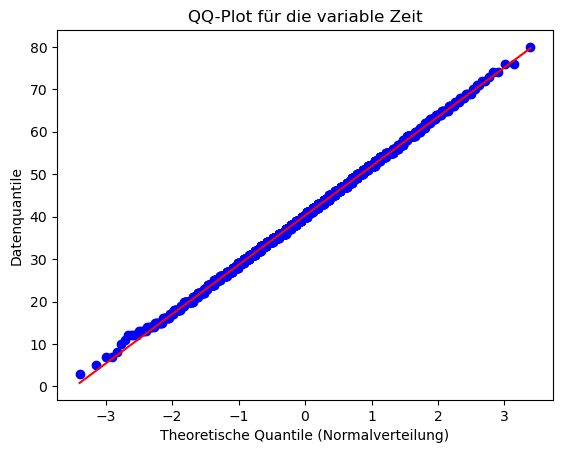

In [43]:
#import matplotloib und scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

#variable Zeit
zeit = df_bkg["Zeit"]

#QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title("QQ-Plot für die variable Zeit")
plt.xlabel("Theoretische Quantile (Normalverteilung)")
plt.ylabel("Datenquantile")
plt.show()

Die Variable Zeit kann als approximativ normalverteilt betrachtet werden.

### F13 Wie viele Kunden haben keinen Bankkredit aufgenommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu erfassen. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen höher als der Autopreis keinen Kredit aufgenommen haben.

In [44]:
#Filterung nach Einkommen-Spalte, wobei in Zeile: Einkommen > Preis
df_kein_kredit = df_preis_vorhanden.loc[df_preis_vorhanden["Einkommen"] > df_preis_vorhanden["Preis"], "Einkommen"]
df_kein_kredit

1048    50330.0
1298    24264.0
1390    54403.0
1533    30856.0
1587    36296.0
Name: Einkommen, dtype: float64

In [45]:
len(df_kein_kredit)

5

### F14 Welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Wählen Sie die geeigneten unabhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

In [46]:
#Neuen Dataframe mit relevanten unabhängigen Variablen erstellen
nicht_rel_var = ["KundeNr", "Niederlassung", "Ausreißer", "Preis"] 
df_rel_var = df_preis_vorhanden.drop(columns = nicht_rel_var)
df_rel_var.head()

,Alter,Einkommen,Geschlecht,Zeit
891,64,66894.0,1.0,43.0
892,54,77644.0,1.0,40.0
893,55,44341.0,0.0,37.0
894,49,67271.0,0.0,42.0
895,46,49832.0,0.0,41.0


In [47]:
y = df_preis_vorhanden["Preis"]
X = df_rel_var
X = sm.add_constant(X)

In [48]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1329.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:18:21   Log-Likelihood:                -11748.
No. Observations:                1104   AIC:                         2.351e+04
Df Residuals:                    1099   BIC:                         2.353e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -128.4750   1532.376     -0.084      0.933   -3135.188    2878.238
Alter        479.7397     39.447     12.162      0.000     402.340     557.140
Einkommen      1.0256      0.037     28.005      0.000       0.954       1.097
Geschlecht  2139.7464    636.427      3.362      0.001     890.997    3388.496
Zeit          71.3735     44.660      1.598      0.110     -16.255     159.002
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.252
Skew:                           0.014   Prob(JB):                        0.535
Kurtosis:                       2.837   Cond. No.                     3.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Schlussfolgerung:

Da der P>|t|-Wert bei der Zeit den Wert 0.05 überschreitet, ist die Zeit ein nicht signifikanter Koeffizient. Daher kann nicht gesagt werden, ob die Zeit einen entscheidenden Einfluss auf den Kaufpreis hat. Dahingegen sind Einkommen, Alter und Geschlecht signifikant.

### F15 Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro. Prognostizieren Sie den Kaufpreis eines unserer Autos für einen männlichen Kunden im Alter von 51 Jahren und mit einem Einkommen von 54.000 Euro.

#### Prognose - männlicher Kunden im Alter von 32 Jahren mit einem Einkommen von 30.000 Euro

In [49]:
y1 = pd.DataFrame({"Alter" : [32], "Einkommen" : [30000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})

In [56]:
#y1 = sm.add_constant(y1) funktioniert nicht, weshalb die predict Funktion nicht funktioniert. Ich füge die Konstante manuell hinzu
y1.insert(0, "const", 1)

In [55]:
y1

,Alter,Einkommen,Geschlecht,Zeit
0,32,30000,1,44.375906


In [57]:
Prognose1 = model.predict(y1)
Prognose1

0    51297.291522
dtype: float64

#### Prognose - männlicher Kunden im Alter von 51 Jahren mit einem Einkommen von 54.000 Euro

In [58]:
y2 = pd.DataFrame({"Alter" : [51], "Einkommen" : [54000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})
y2.insert(0, "const", 1)
Prognose2 = model.predict(y2)
Prognose2

0    85026.014079
dtype: float64

### F16 In Bezug auf die vorherige Frage: Welche Variable beeinflusst den Preis des Autos am meisten? Mit anderen Worten: Die von Ihnen geschätzten Regressionskoeffizienten müssen direkt vergleichbar sein. Wie sollen die Daten transformiert werden?

In [60]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [61]:
# Auswahl der unabhängigen Variablen und der abhängigen Variable
X = df_preis_vorhanden[["Einkommen", "Alter", "Geschlecht", "Zeit"]]
y = df_preis_vorhanden["Preis"]

In [62]:
# Standardisieren der unabhängigen Variablen
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_standardized = scaler_X.fit_transform(X)

In [63]:
# Da y eine pandas Series ist, muss sie in ein 2D-Array umgewandelt werden
y_standardized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

In [64]:
# Konvertieren der standardisierten Variablen zurück in ein DataFrame und hinzufügen einer Konstante
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized = sm.add_constant(X_standardized)

In [65]:
# Regression schätzen (lineare Regression)
model_standardized = sm.OLS(y_standardized, X_standardized).fit()

# Zusammenfassung des Modells anzeigen
model_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1329.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:20:50   Log-Likelihood:                -592.62
No. Observations:                1104   AIC:                             1195.
Df Residuals:                    1099   BIC:                             1220.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.857e-16      0.012  -3.89e-14      1.000      -0.024       0.024
Einkommen      0.6921      0.025     28.005      0.000       0.644       0.741
Alter          0.2344      0.019     12.162      0.000       0.197       0.272
Geschlecht     0.0420      0.012      3.362      0.001       0.017       0.067
Zeit           0.0316      0.020      1.598      0.110      -0.007       0.071
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.252
Skew:                           0.014   Prob(JB):                        0.535
Kurtosis:                       2.837   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Die Variable, die den Preis beim Kauf des Autos am meisten beeinflusst ist das Einkommen.

#### Bild 5: Visualisierung der Regressionskoeffizienten

In [66]:
# Extrahieren der Koeffizienten (ohne den Intercept)
coefficients = model_standardized.params[1:]  # Der erste Koeffizient ist der Intercept, den wir ignorieren
variables = X.columns

In [67]:
# Erstellen eines Datenrahmens für die Visualisierung
coef_df = pd.DataFrame({
    'Variable': variables,
    'Koeffizient': coefficients
})

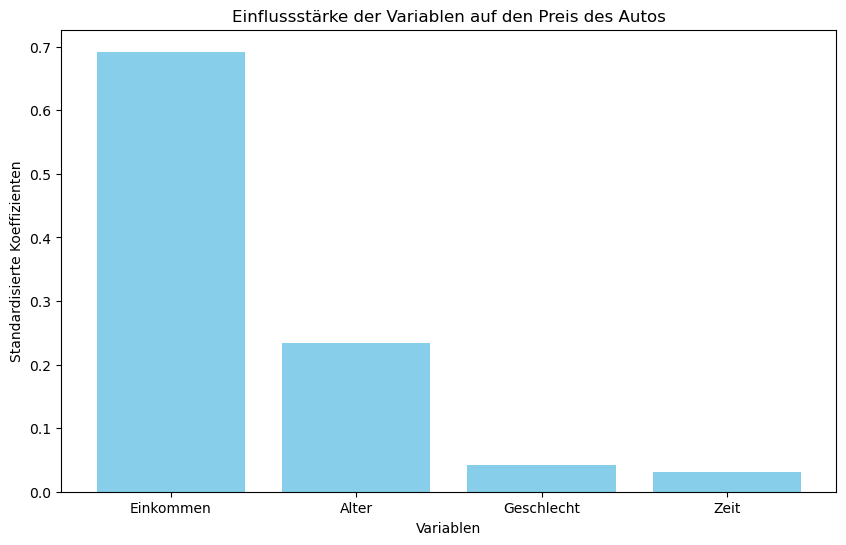

In [68]:
# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Variable'], coef_df['Koeffizient'], color='skyblue')
plt.xlabel('Variablen')
plt.ylabel('Standardisierte Koeffizienten')
plt.title('Einflussstärke der Variablen auf den Preis des Autos')
plt.show()

### F17 Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode.

In [69]:
#definieren der abhängigen Variable
df_bkg["Kauf"] = np.where(df_bkg["Preis"] > 0, 1, 0)

In [70]:
y_lg = df_bkg["Kauf"]
X_lg = df_bkg[["Einkommen", "Alter", "Geschlecht", "Zeit"]]
X_lg = sm.add_constant(X_lg)
model_lg = sm.Logit(y_lg, X_lg).fit()
model_lg.summary()

Optimization terminated successfully.
         Current function value: 0.579008
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Kauf   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.1577
Time:                        21:20:50   Log-Likelihood:                -1155.1
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.469e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4426      0.263     -9.270      0.000      -2.959      -1.926
Einkommen  -4.213e-05   5.43e-06     -7.761      0.000   -5.28e-05   -3.15e-05
Alter          0.0180      0.007      2.630      0.009       0.005       0.031
Geschlecht     0.2466      0.103      2.395      0.017       0.045       0.448
Zeit           0.1022      0.006     17.532      0.000       0.091       0.114
==============================================================================
"""

### F18 Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?

In [71]:
import math

# Koeffizienten
intercept = -2.4426	
coef_Einkommen = -0.00004213  
coef_Alter = 0.0180
coef_Geschlecht = 0.2466
coef_Zeit = 0.1022

# Werte der unabhängigen Variablen
x_Einkommen = 30000
x_Alter = 32
x_Geschlecht = 1
x_Zeit = 30

# Berechnung der linearen Kombination
linear_combination = intercept + (coef_Einkommen * x_Einkommen) + (coef_Alter * x_Alter) + (coef_Geschlecht * x_Geschlecht) + (coef_Zeit * x_Zeit)

# Berechnung der Wahrscheinlichkeit
Wahrscheinlichkeit_Kauf = 1 / (1 + math.exp(-linear_combination))

Wahrscheinlichkeit_Kauf

0.5453996134650454

In [72]:
#X_predict = pd.DataFrame({
#    "Alter": [32],           
#    "Geschlecht": [1],
#    "Einkommen": [30000],
#    "Zeit": [30]
#})

#X_predict = sm.add_constant(X_predict, has_constant='add')
                        
#predicted_probability = model_lg.predict(X_predict)

#print(predicted_probability)

In [73]:
# Koeffizienten
intercept = -2.4426	
coef_Einkommen = -0.00004213  
coef_Alter = 0.0180
coef_Geschlecht = 0.2466
coef_Zeit = 0.1022

# Werte der unabhängigen Variablen
x_Einkommen = 54000
x_Alter = 51
x_Geschlecht = 1
x_Zeit = 45

# Berechnung der linearen Kombination
linear_combination = intercept + (coef_Einkommen * x_Einkommen) + (coef_Alter * x_Alter) + (coef_Geschlecht * x_Geschlecht) + (coef_Zeit * x_Zeit)

# Berechnung der Wahrscheinlichkeit
Wahrscheinlichkeit_Kauf = 1 / (1 + math.exp(-linear_combination))

Wahrscheinlichkeit_Kauf

0.7400022019768026

In [74]:
#X_predict = pd.DataFrame({
#    "Alter": [51],           
#    "Geschlecht": [1],
#    "Einkommen": [54000],
#    "Zeit": [45]
#})

#X_predict = sm.add_constant(X_predict, has_constant='add')

#predicted_probability = model_lg.predict(X_predict)

#np.round(predicted_probability, 10)

### F19 Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen?
0. Wir waren uns zu Beginn unsicher, ob wir die Listen direkt in dem Dataframe zusammenfügen sollen und damit weiterarbeiten (so haben wir es letztendlich gemacht) oder erstmal die Listen der Besucher und Kunden zusammenführen (mit pandas), daraus eine Excel-Datei machen und diese Excelliste dann mit der geo.txt Datei verbinden und auch daraus eine "finale" Exel-Datei zu machen, auf welche wir zugreifen würden. Die 2 Option war der anfängliche Ansatz, aber schien zu umständlich.
1. 
Es war herausfordernd herauszufinden, welche der Funktionen (concat oder merger) zuerst angewendet werden soll bzw. welcher sich besser eignet.
2. 
Ein weiteres Problem war zu verstehen, welche inputs die Funktion Concat benötigt, um die Listen so zusammenzufügen wie man es will. Die Lösung ist im Endeffekt sehr simpel, aber ohne vorheriges Verständnis von der funktionsweise der Funktion, dauert es etwas die Lösung nachzuvollziehen
3. .
Ein ähnliches Problem gab es auch bei der merge-Funktion. Es gibt viele mögliche Variablen die bestimmt werden können und bis man herausgefunden hat, welche man benutzen muss, um die Excelliste und die Weise wie die Liste am Ende aussehen soll, zu erreichen, dauert das eine Weile.

### F20 Welche Vorschläge würden Sie der Kundenabteilung für die Umfrage im nächsten Jahr machen? Welche zusätzlichen Informationen sollten gesammelt werden? Formulieren Sie zwei Vorschläge.

#### 1. Sammlung von Daten über den zeitlichen Abstand zum letzten Autokauf.
##### a) Erstellung von Kaufzyklen: 
Lebensdauer und Abnutzung des Fahrzeuges verfolgen; Budgetierung und Planung der Anschaffung eines Fahrzeuges nachvollziehen
##### b) Marketingstrategien: 
Timing von Angeboten; Maßgeschneiderte Kommunikation wie zum Beispiel Wartungs- und Zubehörangebote für Neukunden und ansprache für neue Autokäufe für alte Kunden

#### 2. Sammlung weiterer Demografischer Daten: Bildungsniveau, Familienstand und Berufsstatus.
##### a) Personalisierte Kundenansprache: 
Indikatoren nutzen zu einem besseren Angebot wie zum Beispiel bei hohem Bildungsgrade vermehrt technologische Features, bei Familie mit Kindern größere Fahrzeuge mit mehr Sitzen.
##### b) Segmentierung und Marktanalyse: 
Identifikation unserer Zielgruppe und gezielte Ansprache auf Basis von Bedürfnisanalysen.
##### c) langfristige Kundenbeziehungen: 
Aufbauen auf Basis mehrer Informationen und einer besseren Fähigkeit daraus Rückschlüsse für eine Steigerung der Kundenzufriedenheit zu ziehen.

### Bild 3: Balkendiagramm - Durchschnittsalter pro Bundesland (von Käufern)

In [75]:
#Alter pro Bundesland bestimmen
df_durchschnittsalter_pro_bundesland = df_preis_vorhanden.groupby("Niederlassung")["Alter"].mean()
df_durchschnittsalter_pro_bundesland = df_durchschnittsalter_pro_bundesland.sort_values(ascending = True)
df_durchschnittsalter_pro_bundesland

Niederlassung
Hessen                 49.250000
Bayern                 49.478723
Nordrhein-Westfalen    49.845714
Niedersachsen          49.947917
Hamburg                50.302326
Thüringen              50.591837
Sachsen                50.910112
Baden-Württemberg      51.136585
Brandenburg            51.378378
Berlin                 51.658730
Name: Alter, dtype: float64

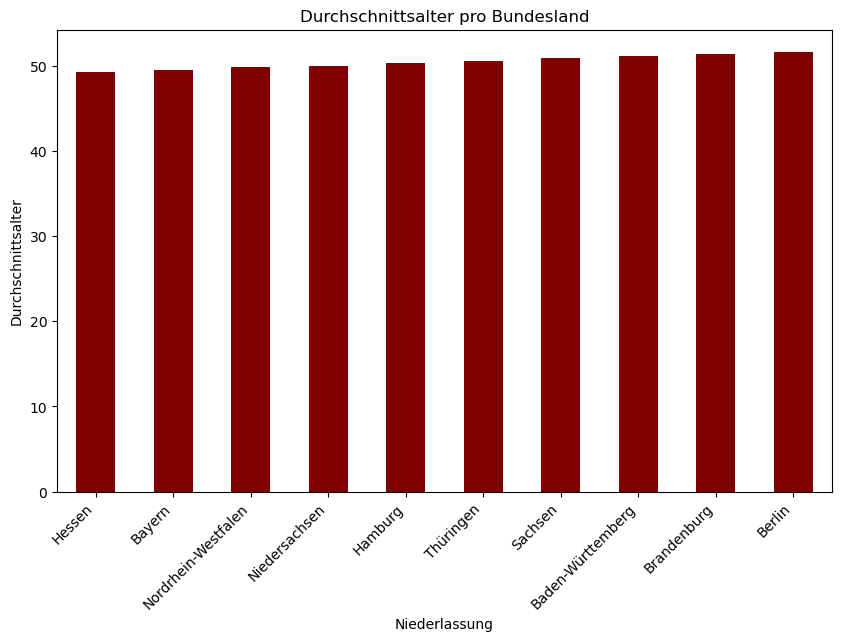

In [76]:
#Balkendiagramm erstellen
plt.figure(figsize=(10,6))
df_durchschnittsalter_pro_bundesland.plot(kind = "bar", color = "#800000")
#Balkendiagramm benennen
plt.title("Durchschnittsalter pro Bundesland")
plt.xlabel("Niederlassung")
plt.ylabel("Durchschnittsalter")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')

### Bild 4: Streudiagramm - Preis und Einkommen Zusammenhang

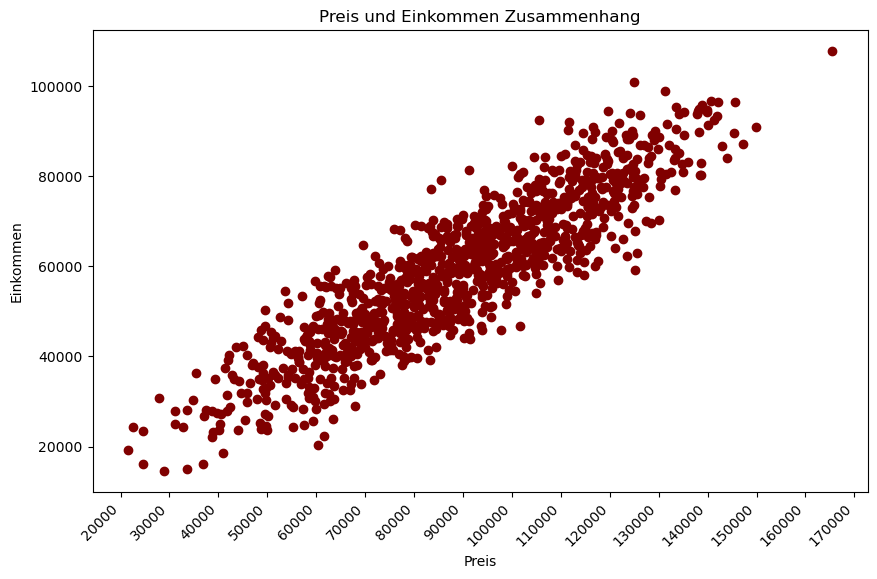

In [77]:
#Streudiagramm erstellen
plt.figure(figsize=(10,6))
plt.scatter(df_preis_vorhanden["Preis"], df_preis_vorhanden["Einkommen"], color = "#800000")
#Balkendiagramm benennen
plt.title("Preis und Einkommen Zusammenhang")
plt.xlabel("Preis")
plt.ylabel("Einkommen")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')
# Zahlen an den Achsen anpassen
_ = plt.xticks(range(20000, 180000, 10000))

# Elektroauto AG - Bundesweite Datenanalyse  <br><br><br> 
05.07.2024  
Datenanalysten: Keanu Kilka, Ryan Oyeneye

# F1 & F3 Verkaufszahlen und Gesamtumsatz<br>
+ Es wurden 1104 Autos verkauft
     
+ Der Gesamtumsatz beträgt 98.228.619,38€




# F2 Preisbetrachtung verkaufter Autos

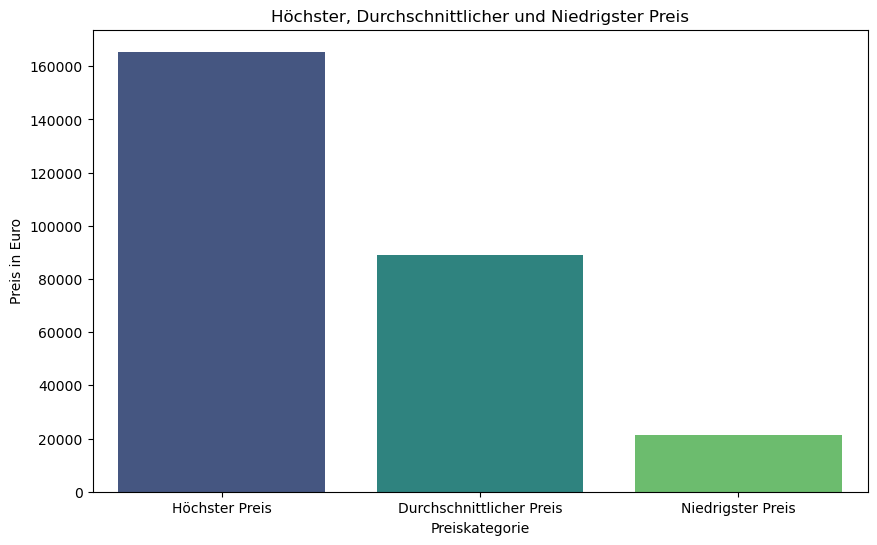

In [78]:
### Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x='Preis', y='Wert', data=price_stats, palette='viridis')
plt.title('Höchster, Durchschnittlicher und Niedrigster Preis')
plt.ylabel('Preis in Euro')
plt.xlabel('Preiskategorie')
plt.show()

# F4 & F5 Verkaufsmenge und ⌀ Umsatz pro Bundesland<br><br>



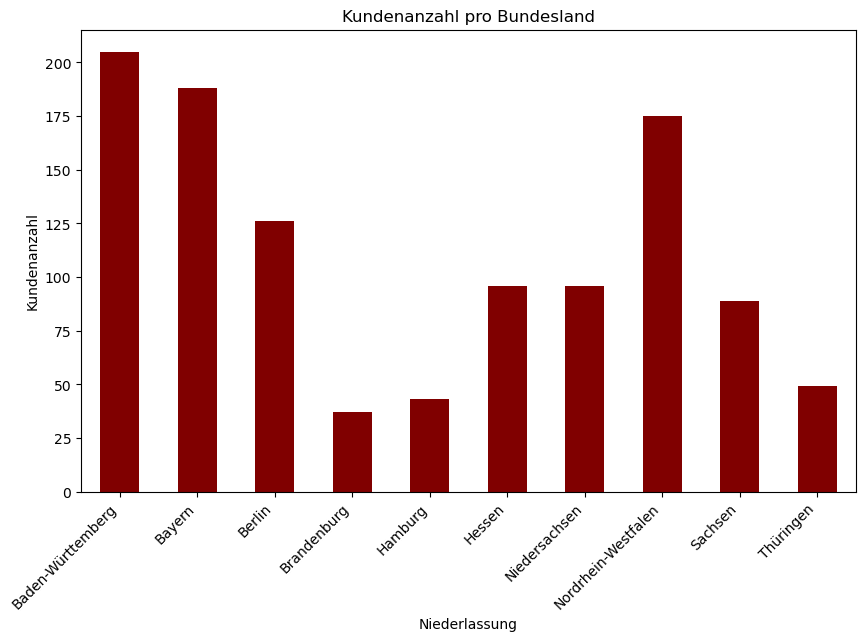

In [79]:

#Balkendiagramm erstellen
#Verwendung von #800000 für die Farbe "Weinrot"
plt.figure(figsize=(10,6))
anzahl_verkauf_pro_land.plot(kind = "bar", color = "#800000")
#Balkendiagramm benennen
plt.title("Kundenanzahl pro Bundesland")
plt.xlabel("Niederlassung")
plt.ylabel("Kundenanzahl")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')

In [80]:
#Ermittelung der Spalten wo Preis vorhanden ist
df_mit_preis = df_bkg[df_bkg["Preis"].notna()]
#Ermittlung Durchschnittsumsatz pro Bundesland
durchschnitt_umsatz_pro_land = df_mit_preis.groupby('Niederlassung')['Preis'].mean()
durchschnitt_umsatz_pro_land.sort_values(ascending=False)

Niederlassung
Baden-Württemberg      90969.560000
Thüringen              90816.994082
Berlin                 89584.984048
Sachsen                89455.080674
Bayern                 89344.313245
Nordrhein-Westfalen    88633.265200
Niedersachsen          87963.312500
Brandenburg            86673.640811
Hessen                 85864.929479
Hamburg                85549.499070
Name: Preis, dtype: float64

# F8 Durchschnittsalter - Kunden & Besucher<br><br>


In [81]:
#Berechnung des Durchschnitssalters unserer Kunden
durchschnittsalter_Kunden = df_mit_preis["Alter"].mean()
durchschnittsalter_Kunden

50.375

In [82]:
#Berechnung des Durchschnitssalters unserer Besucher
#Filtern der Besucher
df_ohne_preis = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittsalter
durchschnittsalter_Besucher = df_ohne_preis["Alter"].mean()
durchschnittsalter_Besucher

49.88103254769921

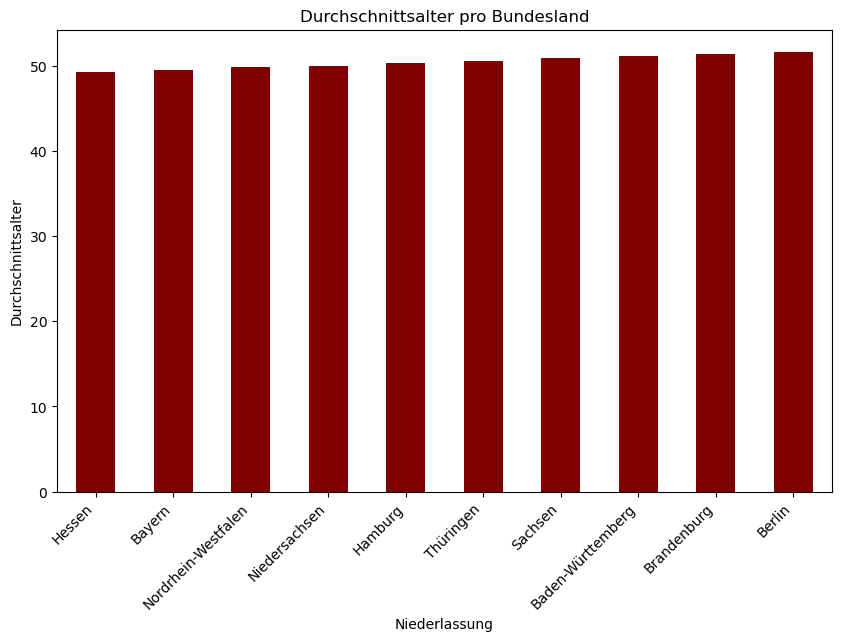

In [83]:
#Balkendiagramm erstellen
plt.figure(figsize=(10,6))
df_durchschnittsalter_pro_bundesland.plot(kind = "bar", color = "#800000")
#Balkendiagramm benennen
plt.title("Durchschnittsalter pro Bundesland")
plt.xlabel("Niederlassung")
plt.ylabel("Durchschnittsalter")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')

# F14 sozioökonimische Merkmale - Kaufpreis?<br><br>


Die Kundenliste einschränken auf die relevanten Merkmale
+ Alter
+ Einkommen 
+ Geschlecht
+ Zeit<br>

Mittels der Datenpunkte dieser Merkmale bestimmen wir die Regression, um das Außmaß der Beeinflussung abzuwägen

In [84]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Preis   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          2.258e+04
Date:                Thu, 27 Jun 2024   Prob (F-statistic):                        0.00
Time:                        21:20:52   Log-Likelihood:                         -11748.
No. Observations:                1104   AIC:                                  2.350e+04
Df Residuals:                    1100   BIC:                                  2.352e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Einkommen      1.0261      0.036     28.535      0.000       0.956       1.097
Alter        478.1874     34.816     13.735      0.000     409.874     546.501
Geschlecht  2126.0678    614.882      3.458      0.001     919.593    3332.542
Zeit          69.7922     40.464      1.725      0.085      -9.602     149.187
==============================================================================
Omnibus:                        1.263   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                1.262
Skew:                           0.014   Prob(JB):                        0.532
Kurtosis:                       2.837   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Anhand der Koeffizenten sehen wir wie stark sich der Kaufpreis ändert, wenn wir das jeweilige Merkmal um eine Einheit verändern.

Da der P>|t|-Wert bei der Zeit den Wert 0.05 überschreitet, ist die Zeit ein nicht signifikanter Koeffizient. Daher kann nicht gesagt werden, ob die Zeit einen entscheidenden Einfluss auf den Kaufpreis hat. Dahingegen sind Einkommen, Alter und Geschlecht signifikant.

# F20 Vorschläge an Kundenabteilung bzgl. der Erfassung zusätzlicher Daten<br><br>


### 1. Sammlung von Daten über den zeitlichen Abstand zum letzten Autokauf. <br>
  
#### a) Erstellung von Kaufzyklen:
Lebensdauer und Abnutzung des Fahrzeuges verfolgen; Budgetierung und Planung der Anschaffung eines Fahrzeuges nachvollziehen

#### b) Marketingstrategien:
Timing von Angeboten; Maßgeschneiderte Kommunikation wie zum Beispiel Wartungs- und Zubehörangebote für Neukunden und ansprache für neue Autokäufe für alte Kunden

### 2. Sammlung weiterer Demografischer Daten: Bildungsniveau, Familienstand und Berufsstatus.<br>
  
#### a) Personalisierte Kundenansprache:
Indikatoren nutzen zu einem besseren Angebot wie zum Beispiel bei hohem Bildungsgrade vermehrt technologische Features, bei Familie mit Kindern größere Fahrzeuge mit mehr Sitzen.

#### b) Segmentierung und Marktanalyse:
Identifikation unserer Zielgruppe und gezielte Ansprache auf Basis von Bedürfnisanalysen.

#### c) langfristige Kundenbeziehungen:
Aufbauen auf Basis mehrer Informationen und einer besseren Fähigkeit daraus Rückschlüsse für eine Steigerung der Kundenzufriedenheit zu ziehen.

# Daten zusammenfügen


## 1 Dateien importieren und in Data Frames überführen
file_k = "Data/kunden.csv"
file_b = "Data/besucher.csv"
file_geo = "Data/geo.txt"

df_k = pd.read_csv(file_k, sep = ";", decimal = ".")
df_b = pd.read_csv(file_b, sep = ";", decimal = ",")
df_geo = pd.read_table(file_geo, delimiter = "\t")

## 2 Data Frames von Besucher und Kunden zusammenfügen


In [85]:
df_b_k = pd.concat([df_b,df_k], ignore_index = True)
df_b_k

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis
0,30,39919.095335,0.0,29.0,K1814,NaN
1,41,53430.673086,0.0,27.0,K1544,NaN
2,64,73163.216927,0.0,32.0,K1945,NaN
3,41,36761.482581,0.0,44.0,K1825,NaN
4,35,42684.331632,1.0,33.0,K1144,NaN
...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58
1991,38,48301.000000,1.0,33.0,K0122,64230.98
1992,67,63547.000000,1.0,41.0,K1045,103123.57
1993,37,32686.000000,1.0,36.0,K1096,49215.87


## 3 Data Frames von geo zur kombinierten Liste hinzufügen


In [86]:
df_bkg = pd.merge(df_b_k, df_geo, on = "KundeNr")
df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen
...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg


# Datenbereinigung
bereinigt wurden
  + Einkommen (obere Schranke = 200k€, untere Schranke 10k€)
  
  + Alter (obere Schranke ca. 90 Jahre)
  
  + Geschlecht (fehlende Werte durch Modus ersetzt)

## Hier am Beispiel des Einkommens:


In [87]:
# Berechnung von Q1 (25. Perzentil), Q3 (75. Perzentil) und IQR
Q1 = df_bkg['Einkommen'].quantile(0.25)
Q3 = df_bkg['Einkommen'].quantile(0.75)
IQR = Q3 - Q1

# Berechnung der Ausreißer-Grenzen
untere_grenze = Q1 - 1.6 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst
obere_grenze = Q3 + 5 * IQR #Faktor auf die Ausreißer nach eigenem Ermessen angepasst

# Identifizierung von Ausreißern
df_bkg['Ausreißer'] = (df_bkg['Einkommen'] < untere_grenze) | (df_bkg['Einkommen'] > obere_grenze)

df_bkg

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Preis,Niederlassung,Ausreißer
0,30,39919.095335,0.0,29.0,K1814,NaN,Bayern,False
1,41,53430.673086,0.0,27.0,K1544,NaN,Baden-Württemberg,False
2,64,73163.216927,0.0,32.0,K1945,NaN,Baden-Württemberg,False
3,41,36761.482581,0.0,44.0,K1825,NaN,Baden-Württemberg,False
4,35,42684.331632,1.0,33.0,K1144,NaN,Nordrhein-Westfalen,False
...,...,...,...,...,...,...,...,...
1990,70,69581.000000,1.0,51.0,K0467,103751.58,Thüringen,False
1991,38,48301.000000,1.0,33.0,K0122,64230.98,Niedersachsen,False
1992,67,63547.000000,1.0,41.0,K1045,103123.57,Berlin,False
1993,37,32686.000000,1.0,36.0,K1096,49215.87,Baden-Württemberg,False


# F6 In welchem Bundesland wurde das teuerste Auto verkauft?
Das teuerste Auto wurde in Niedersachsen verkauft


In [88]:
max_preis_index = df_mit_preis["Preis"].idxmax()
bundesland_teuerstes_auto = df_mit_preis.loc[max_preis_index, "Niederlassung"]
bundesland_teuerstes_auto

'Niedersachsen'

# F7 Haben mehr Frauen oder mehr Männer unsere Autos gekauft?
Es haben mehr Männer unsere Autos gekauft


In [89]:
df_preis_vorhanden["Geschlecht"].mode()

0    1.0
Name: Geschlecht, dtype: float64

# F11 Korrelation - Alter, Einkommen, Preis und Zeit?
Die Pearson Korrelation liegt wie folgt zwischen den Variablen Alter, Einkommen, Preis und Zeit:


In [90]:
corr_kundenwerte = df_preis_vorhanden[["Alter", "Einkommen", "Preis", "Zeit"]].corr()
corr_kundenwerte

,Alter,Einkommen,Preis,Zeit
Alter,1.000000,0.761572,0.780478,0.588912
Einkommen,0.761572,1.000000,0.896565,0.776211
Preis,0.780478,0.896565,1.000000,0.707778
Zeit,0.588912,0.776211,0.707778,1.000000


# F12 Zeit approximativ normalverteilt? - qq-Plots
Die variable Zeit kann als approximativ normalverteilt betrachtet werden.

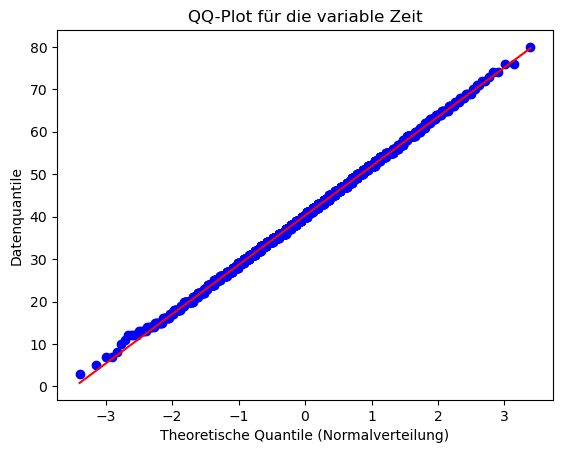

In [91]:
#import matplotloib und scipy
import matplotlib.pyplot as plt
import scipy.stats as stats

#variable Zeit
zeit = df_bkg["Zeit"]

#QQ-Plot erstellen
stats.probplot(zeit, dist="norm", plot=plt)
plt.title("QQ-Plot für die variable Zeit")
plt.xlabel("Theoretische Quantile (Normalverteilung)")
plt.ylabel("Datenquantile")
plt.show()

# F9 Durchschnittseinkommen Kunden & Besucher?

+ Das Durchschnittseinkommen unserer Kunden beträgt in etwa 58.895,25 €
+ Das Durchschnittseinkommen unserer Besucher beträgt in etwa 59.367,94 €


In [92]:
#Berechnung des Durchschnitteinkommens unserer Kunden
df_preis_vorhanden["Einkommen"].mean()

58895.24686507354

In [93]:
#Berechnung des Durchschnitteinkommens unserer Besucher
#Ermittlungen der Zeilen mit NAN in der Preis-Spalte
df_preis_nicht_vorhanden = df_bkg[df_bkg["Preis"].isna()]
#Durchschnittseinkommen der Besucher berechenen
df_preis_nicht_vorhanden["Einkommen"].mean()

59367.93618779704

# F13  Bankkredit für Autokauf?
Man kann davon ausgehen, dass 5 Kunden keinen Kredit aufgenommen haben, um das Auto zu kaufen


In [94]:
#Filterung nach Einkommen-Spalte, wobei in Zeile: Einkommen > Preis
df_kein_kredit = df_preis_vorhanden.loc[df_preis_vorhanden["Einkommen"] > df_preis_vorhanden["Preis"], "Einkommen"]
df_kein_kredit

1048    50330.0
1298    24264.0
1390    54403.0
1533    30856.0
1587    36296.0
Name: Einkommen, dtype: float64

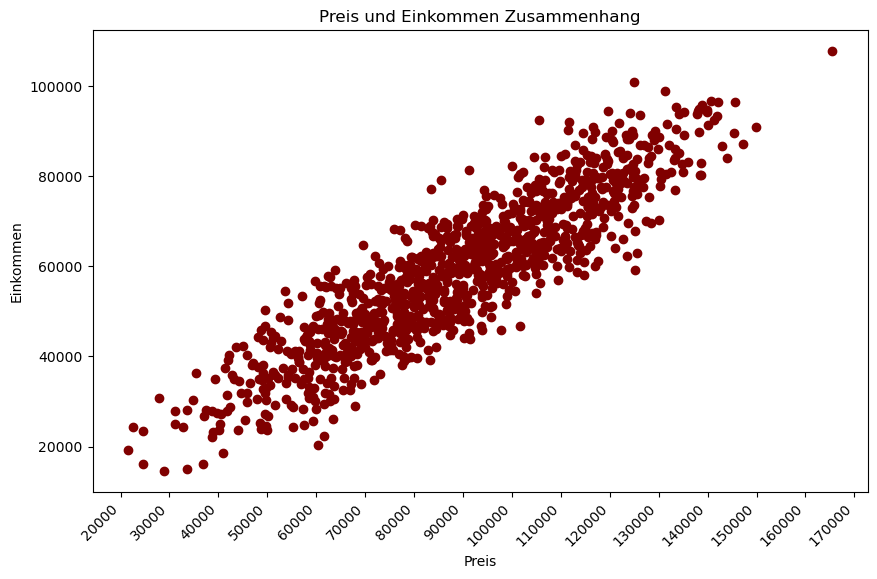

In [95]:
#Streudiagramm erstellen
plt.figure(figsize=(10,6))
plt.scatter(df_preis_vorhanden["Preis"], df_preis_vorhanden["Einkommen"], color = "#800000")
#Balkendiagramm benennen
plt.title("Preis und Einkommen Zusammenhang")
plt.xlabel("Preis")
plt.ylabel("Einkommen")
#Rotieren der Bundeslandbezeichnungen auf der x-Achse (der hinzugefügte Unterstrich unterbindet ungewollte Ausgaben)
_ = plt.xticks(rotation=45, ha='right')
# Zahlen an den Achsen anpassen
_ = plt.xticks(range(20000, 180000, 10000))

# F15 Prognose Kaufpreis: 
Kundenprofil - Einkommen von 30.000 Euro und Alter 32 Jahre alt <br>
  
Auf Basis der statistischen Erhebnung kann davon ausgegangen werden, dass ein 32-Jähriger männlicher Kunde mit einem EInkommen von 30.000€ ein Auto zum Preis von 51.297,29 € kaufen würde.


In [96]:
 y1 = pd.DataFrame({"Alter" : [32], "Einkommen" : [30000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})
y1 = sm.add_constant(y1)
y1

,Alter,Einkommen,Geschlecht,Zeit
0,32,30000,1,44.375906


In [97]:
Prognose1 = model.predict(y1)
Prognose1

0    1.435088e+07
dtype: float64

# F15 Prognose Kaufpreis: Kundenprofil - Einkommen von  54.000 Euro + Alter 51 Jahre alt<br>
Ein 51-Jähriger männlicher Kunde würde hingegen bei einem Einkommen von 54.000 € ein Auto zum Preis von 85.026,01 € kaufen.

In [98]:
y2 = pd.DataFrame({"Alter" : [51], "Einkommen" : [54000], "Geschlecht" : [1], "Zeit" : [df_preis_vorhanden["Zeit"].mean()]})
y1 = sm.add_constant(y1)
Prognose2 = model.predict(y2)
Prognose2


0    2.582739e+07
dtype: float64

# F16 Welche Variable beeinflusst den Kaufpreis am stärksten? <br>
Die Variable, die den Preis beim Kauf des Autos am meisten beeinflusst, ist das Einkommen.


In [99]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
# Auswahl der unabhängigen Variablen und der abhängigen Variable
X = df_preis_vorhanden[["Einkommen", "Alter", "Geschlecht", "Zeit"]]
y = df_preis_vorhanden["Preis"]


# Standardisieren der unabhängigen Variablen
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_standardized = scaler_X.fit_transform(X)



# Da y eine pandas Series ist, muss sie in ein 2D-Array umgewandelt werden
y_standardized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()


# Konvertieren der standardisierten Variablen zurück in ein DataFrame und hinzufügen einer Konstante
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)
X_standardized = sm.add_constant(X_standardized)



# Regression schätzen (lineare Regression)
model_standardized = sm.OLS(y_standardized, X_standardized).fit()

In [100]:
# Zusammenfassung des Modells anzeigen
model_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1329.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:20:53   Log-Likelihood:                -592.62
No. Observations:                1104   AIC:                             1195.
Df Residuals:                    1099   BIC:                             1220.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.857e-16      0.012  -3.89e-14      1.000      -0.024       0.024
Einkommen      0.6921      0.025     28.005      0.000       0.644       0.741
Alter          0.2344      0.019     12.162      0.000       0.197       0.272
Geschlecht     0.0420      0.012      3.362      0.001       0.017       0.067
Zeit           0.0316      0.020      1.598      0.110      -0.007       0.071
==============================================================================
Omnibus:                        1.250   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.535   Jarque-Bera (JB):                1.252
Skew:                           0.014   Prob(JB):                        0.535
Kurtosis:                       2.837   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
# Extrahieren der Koeffizienten (ohne den Intercept)
coefficients = model_standardized.params[1:]  # Der erste Koeffizient ist der Intercept, den wir ignorieren
variables = X.columns


# Erstellen eines Datenrahmens für die Visualisierung
coef_df = pd.DataFrame({
    'Variable': variables,
    'Koeffizient': coefficients
})

Text(0.5, 1.0, 'Einflussstärke der Variablen auf den Preis des Autos')

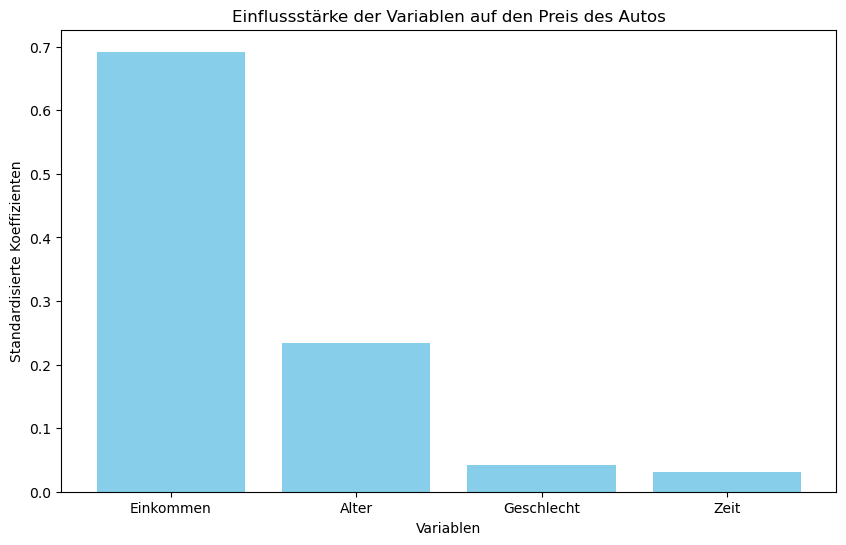

In [102]:
# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Variable'], coef_df['Koeffizient'], color='skyblue')
plt.xlabel('Variablen')
plt.ylabel('Standardisierte Koeffizienten')
plt.title('Einflussstärke der Variablen auf den Preis des Autos')

# F17 Schätzung Regression - Autokauf 

In [103]:
#definieren der abhängigen Variable
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Kauf   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.1577
Time:                        21:20:53   Log-Likelihood:                -1155.1
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.469e-92
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4426      0.263     -9.270      0.000      -2.959      -1.926
Einkommen  -4.213e-05   5.43e-06     -7.761      0.000   -5.28e-05   -3.15e-05
Alter          0.0180      0.007      2.630      0.009       0.005       0.031
Geschlecht     0.2466      0.103      2.395      0.017       0.045       0.448
Zeit           0.1022      0.006     17.532      0.000       0.091       0.114
==============================================================================
"""

# F18 Wahrscheinlichkeitsberechnung 1
#### Kundenprofil: 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft?

Auf Basis der Koeffizienten aus der geschätzten Regression zur Wahrscheinlichkeit eines Autokaufs, lässt sich ermitteln, dass die Wahrscheinlichkeit, dass ein 32-Jähriger männlicher Kunde mit einem Einkommen von 30.000 € und einer 30-Minütigen Testdauer Kauft liegt in etwa bei 54,54 % 

In [104]:
import math

# Koeffizienten
intercept = -2.4426	
coef_Einkommen = -0.00004213  
coef_Alter = 0.0180
coef_Geschlecht = 0.2466
coef_Zeit = 0.1022

# Werte der unabhängigen Variablen
x_Einkommen = 30000
x_Alter = 32
x_Geschlecht = 1
x_Zeit = 30

# Berechnung der linearen Kombination
linear_combination = intercept + (coef_Einkommen * x_Einkommen) + (coef_Alter * x_Alter) + (coef_Geschlecht * x_Geschlecht) + (coef_Zeit * x_Zeit)

# Berechnung der Wahrscheinlichkeit
Wahrscheinlichkeit_Kauf = 1 / (1 + math.exp(-linear_combination))*100

f"{Wahrscheinlichkeit_Kauf} %"


'54.53996134650454 %'

# F18 Wahrscheinlichkeitsberechnung 2
#### Kundenprofil: 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?<br>
Die Wahrscheinlichkeit, dass ein 51-Jähriger männlicher Kunde mit einem Einkommen von 54.000 € und einer 45-Minütigen Testdauer kauft, liegt hingegen mit in etwa  74 % deutlich höher. 

In [105]:
# Koeffizienten
intercept = -2.4426	
coef_Einkommen = -0.00004213  
coef_Alter = 0.0180
coef_Geschlecht = 0.2466
coef_Zeit = 0.1022

# Werte der unabhängigen Variablen
x_Einkommen = 54000
x_Alter = 51
x_Geschlecht = 1
x_Zeit = 45

# Berechnung der linearen Kombination
linear_combination = intercept + (coef_Einkommen * x_Einkommen) + (coef_Alter * x_Alter) + (coef_Geschlecht * x_Geschlecht) + (coef_Zeit * x_Zeit)

# Berechnung der Wahrscheinlichkeit
Wahrscheinlichkeit_Kauf = 1 / (1 + math.exp(-linear_combination)) * 100

f"{Wahrscheinlichkeit_Kauf} %"


'74.00022019768025 %'